# Physics 300 
## Computational Physics I (Fall 2018)
## BPB-248, Mon/Wed 02:30 - 03:45 pm 

|Instructor| Prof. Qiang Zhu|
|--|-------------------------------|
|Email | qiang.zhu@unlv.edu|
|Website|http://www.physics.unlv.edu/~qzhu/|
|Office| BPB 232|
|Office hours | Mon/Wed 03:45 - 05:00 pm |

# 18 Global Optmization (II)
## 18.1 Many atoms with Lennard Jone potential
We have learned in the previous lecture that the interatomic pair could be described by a simple Lennard Jones formula:

$$ V = 4\epsilon \big[ \big(\frac{\delta}{r}\big)^{12} - \big(\frac{\delta}{r}\big)^{6} \big]$$

Suppose we have $N$ atoms to consider, 

__Question__: how many atomic pairs will we have?


there will be $N\times(N-1)/2$ pairs to consider. For each pair, we need to
calculate the distance $r$, and then evaluate the energy according the LJ formula

### Cambridge cluster database

Global optimization of LJ clusters has been one of the most interesting subject in computational physics/chemistry community. It has become a gold standard test bed when people wants to propose a new method.

Below is link to those reported geometry and energy values collected by Wales's group in Cambridge.

- [N = 1-150](http://doye.chem.ox.ac.uk/jon/structures/LJ/tables.150.html)
- [N = 310-561](http://doye.chem.ox.ac.uk/jon/structures/LJ/LJ310-561.html) 



In [1]:
import numpy as np

def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

def total_energy(positions):
    """
    Calculate the total energy
    input:
    positions: 3*N array which represents the atomic positions
    output
    E: the total energy
    """
    E = 0
    N_atom = int(len(positions)/3)

    #positions = [x0, y0, z0, x1, y1, z1, .....  , xn, yn, zn]
    for i in range(N_atom-1):
        for j in range(i+1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            #print('pos1:  ', pos1)
            #print('pos2:  ', pos2)
            dist = np.linalg.norm(pos1-pos2)
            #print(i,j, dist)
            E += LJ(dist)
    return E
            
def init_pos(N, L=5):
    return L*np.random.random_sample((N*3,))
            

In [2]:
#now we can deal with many atoms
pos = init_pos(5)
total_energy(pos)

-0.4309977353899531

In [3]:
from scipy.spatial.distance import cdist
import numpy as np

a = np.array([[0,0,0],[0,1,0]])
b = np.array([[0,0,0],[0,1,0]])

c = cdist(a,b)
print(c)

[[0. 1.]
 [1. 0.]]


In [4]:
#below are some reference values from Cambridge Cluster database,
#http://doye.chem.ox.ac.uk/jon/structures/LJ/tables.150.html
#please try to download some values from there and check if the results are consistent

#pos =np.array([  -0.3616353090,        0.0439914505,        0.5828840628,
#                  0.2505889242,        0.6193583398,       -0.1614607010,
#                 -0.4082757926,       -0.2212115329,       -0.5067996704,
#                  0.5193221773,       -0.4421382574,        0.08537630870])
#pos =np.array([ -0.2604720088,        0.7363147287,        0.4727061929,
#                 0.2604716550,       -0.7363150782,       -0.4727063011,
#                -0.4144908003,       -0.3652598516,        0.3405559620,
#                -0.1944131041,        0.2843471802,       -0.5500413671,
#                 0.6089042582,        0.0809130209,        0.2094855133])

pos = np.array([ 0.7430002202,        0.2647603899,       -0.0468575389,
                -0.7430002647,       -0.2647604843,        0.0468569750,
                 0.1977276118,       -0.4447220146,        0.6224700350,
                -0.1977281310,        0.4447221826,       -0.6224697723,
                -0.1822009635,        0.5970484122,        0.4844363476,
                 0.1822015272,       -0.5970484858,       -0.4844360463])
total_energy(pos)

-12.712062256782637

### Quiz
Any elegant way to download data, and run it directly?

In [5]:
import numpy as np
import requests

def get_pos_from_url(address='http://doye.chem.ox.ac.uk/jon/structures/LJ/points/', N=7):
    url_address = address + str(N)
    data_str = requests.get(url_address).text
    return parse_url_text(data_str)    
    
def parse_url_text(data_str):
    x_array = []
    text = data_str.split('\n')
    for line in text:
        [x_array.append(float(i)) for i in line.split()]
    return np.array(x_array)


In [6]:
pos = get_pos_from_url(N=6)
total_energy(pos)

-12.712062256782637

In [7]:
pos

array([ 0.74300022,  0.26476039, -0.04685754, -0.74300026, -0.26476048,
        0.04685698,  0.19772761, -0.44472201,  0.62247003, -0.19772813,
        0.44472218, -0.62246977, -0.18220096,  0.59704841,  0.48443635,
        0.18220153, -0.59704849, -0.48443605])

In [8]:
#Visulization of the LJ clusters
#ASE package is required: the installation can be done via 'conda install ase' command
from ase.visualize import view
from ase import Atoms
N = 13
pos = get_pos_from_url(N=N)
cluster = Atoms('N'+str(N), positions=np.reshape(pos*2.0,[N,3]))
view(cluster, viewer='x3d') #view it from jupyter notebook
#view(cluster, viewer='ase') #view it from pop-up ase visualizer

In [9]:
#Another simpler way to read from url
import pandas as pd
import numpy as np
# Load dataset
N=13
url = "http://doye.chem.ox.ac.uk/jon/structures/LJ/points/"+str(N)
names = ['x', 'y', 'z']
dataset = pd.read_csv(url, names=names, delim_whitespace=True)
pos = dataset.values
pos = np.reshape(pos, [N*3,1])
total_energy(pos)


-44.32680141873467

## 18.2 Global optimization on LJ Clusters

Since we now know how to evaluate the energy for LJ clusters with any arbitray number, let's proceed to run global minimizations to find the ground state configurations. Try to compare your results with the Cambridge database, and see if you get the right values.
### 18.2.1 one step optimization

In [10]:
from scipy.optimize import minimize

pos = init_pos(8)
res = minimize(total_energy, pos, method='CG', tol=1e-4)
print(res.fun)

-18.778208173772562


### 18.2.2 multiple steps optimization

In [11]:
from scipy.optimize import minimize

f_values = []
x_values = []
N_attempts = 2
N_atom = 13
for i in range(N_attempts):
    pos = init_pos(N_atom)
    res = minimize(total_energy, pos, method='CG', tol=1e-4)
    f_values.append(res.fun)
    x_values.append(res.x)
    if i%10==0:
        print('step: ', i, '  values:', res.fun)

print('The global minimum:  ', min(f_values))

step:  0   values: -37.53580195294478
The global minimum:   -38.76321382957413


### 18.2.3 Statistics
In addition to find the global minimum, we can also do some statistic analysis on the local minimum identified in each system. This could give us some rough ideas about the whole picture, or more precisely, energy landscape.

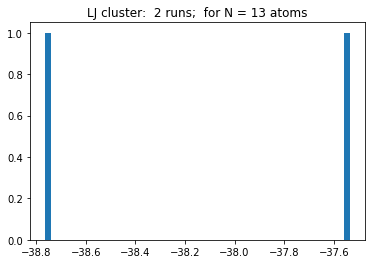

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('LJ cluster:  '+ str(N_attempts)+ ' runs;  for N = ' + str(N_atom)+' atoms')
plt.hist(f_values,50)
plt.show()

## 18.3 Homework

Try different minimization methods in scipy on larger systems ($N$ up to 20), and show 
- 1 the average number of attempts to find the ground state
- 2 the time costs


### Optional
try to improve the code to make it run faster, analyze the most time consuming part and give your solution


# Appendix

The calculation of LJ energy could become a problem when the number of atoms becomes large. A simple vecterization of the total energy could be very helpful. Below is the code contributed by David in the class.


In [13]:
import numpy as np
from scipy.spatial.distance import cdist
from scipy.optimize import minimize
import requests

def get_pos_from_url(address='http://doye.chem.ox.ac.uk/jon/structures/LJ/points/', N=7):
    url_address = address + str(N)
    data_str = requests.get(url_address).text
    return parse_url_text(data_str)    
    
def parse_url_text(data_str):
    x_array = []
    text = data_str.split('\n')
    for line in text:
        [x_array.append(float(i)) for i in line.split()]
    return np.array(x_array)

def dist(N_atoms):
    pos = get_pos_from_url(N = N_atoms)
    pos = np.reshape(pos,[N_atoms,3])
    #pos = 10*np.random.random(N_atoms*3)
    #pos = np.reshape(pos,[N_atoms,3])
    distance = cdist(pos,pos,'euclidean')
    iu1 = np.triu_indices(N_atoms)
    distance = distance[iu1]
    index = np.argwhere(distance==0)
    distance = np.delete(distance,index)
    return distance
    
def LJ(r):
    r6 = np.power(r,6)
    r12 = np.multiply(r6,r6)
    return 4*(1/r12 - 1/r6)
    
def Total_Energy(positions):

    E = LJ(positions)
    Energy = np.sum(E)
    return Energy

N_attempts = 50
f_values = []
x_values = []


def ground_state_potential(N_atom):
    pos = dist(N_atom)
    for i in range(N_attempts):
        
        res = minimize(Total_Energy, pos, method='CG', tol=1e-4)
        f_values.append(res.fun)
        x_values.append(res.x)
        #if i%10==0:
         #   print('step: ', i, '  values:', res.fun)

    print('The ground state potential is:  ', min(f_values))

In [14]:
ground_state_potential(6)

The ground state potential is:   -14.999999999889264
